# NHL PLAYER'S SALARY PREDICTION 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv",encoding="latin1")#data.csv contains both test and train data

In [3]:
data.head()

,Salary,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,925000,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,...,1,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,2250000,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,...,98,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,8000000,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,...,70,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,3500000,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,...,22,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1750000,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,...,68,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Columns: 143 entries, Salary to GS/G
dtypes: float64(37), int64(96), object(10)
memory usage: 958.7+ KB


In [5]:
X=data.drop(['Salary'],axis=1)
y=data["Salary"]
X.head()


,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,97-01-30,Sainte-Marie,QC,CAN,CAN,74,190,2015.0,1.0,18.0,...,1,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,93-12-21,Ottawa,ON,CAN,CAN,74,207,2012.0,1.0,15.0,...,98,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,88-04-16,St. Paul,MN,USA,USA,72,218,2006.0,1.0,7.0,...,70,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,92-01-07,Ottawa,ON,CAN,CAN,77,220,2010.0,1.0,3.0,...,22,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,94-03-29,Toronto,ON,CAN,CAN,76,217,2012.0,1.0,16.0,...,68,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


In [6]:
y.head()

0     925000
1    2250000
2    8000000
3    3500000
4    1750000
Name: Salary, dtype: int64

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Columns: 142 entries, Born to GS/G
dtypes: float64(37), int64(95), object(10)
memory usage: 952.0+ KB


C:\Users\Sairam\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


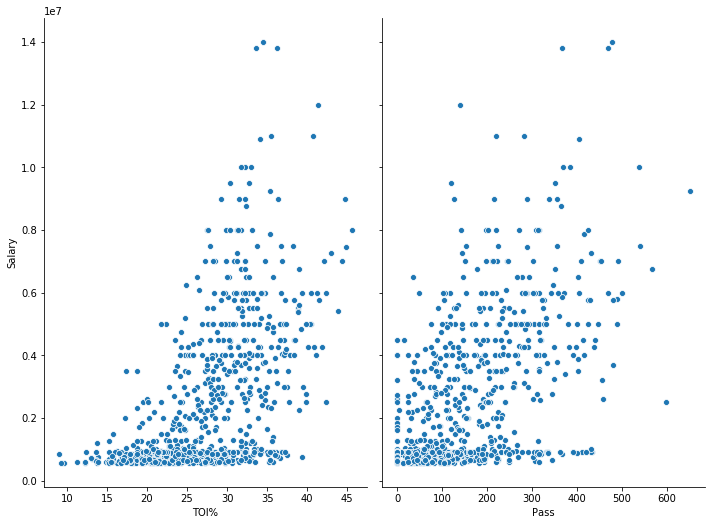

In [8]:
import seaborn as sns
sns.pairplot(data, x_vars=['TOI%','Pass'], y_vars='Salary', size=7, aspect=0.7)

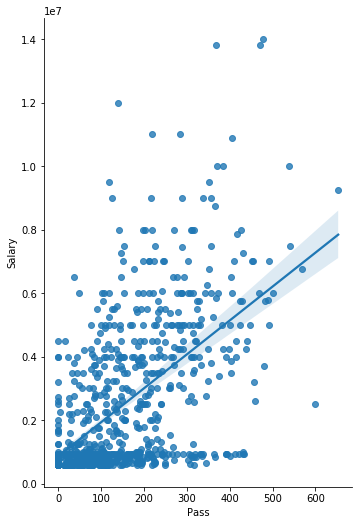

In [9]:
sns.pairplot(data, x_vars=['Pass'], y_vars='Salary', height=7, aspect=0.7, kind='reg')

In [10]:
print(X.select_dtypes('object').head())

       Born          City Pr/St Cntry  Nat Hand   Last Name First Name  \
0  97-01-30  Sainte-Marie    QC   CAN  CAN    L      Chabot     Thomas   
1  93-12-21        Ottawa    ON   CAN  CAN    R        Ceci       Cody   
2  88-04-16      St. Paul    MN   USA  USA    R      Okposo       Kyle   
3  92-01-07        Ottawa    ON   CAN  CAN    R  Gudbranson       Erik   
4  94-03-29       Toronto    ON   CAN  CAN    R      Wilson        Tom   

  Position Team  
0        D  OTT  
1        D  OTT  
2       RW  BUF  
3        D  VAN  
4       RW  WSH  


In [11]:
obj_cols=X.select_dtypes('object')
for c in obj_cols.columns:
    print('Obj Col: ', c, '   Number of Unqiue Values ->', len(obj_cols[c].unique()))

Obj Col:  Born    Number of Unqiue Values -> 790
Obj Col:  City    Number of Unqiue Values -> 481
Obj Col:  Pr/St    Number of Unqiue Values -> 39
Obj Col:  Cntry    Number of Unqiue Values -> 19
Obj Col:  Nat    Number of Unqiue Values -> 17
Obj Col:  Hand    Number of Unqiue Values -> 2
Obj Col:  Last Name    Number of Unqiue Values -> 786
Obj Col:  First Name    Number of Unqiue Values -> 380
Obj Col:  Position    Number of Unqiue Values -> 20
Obj Col:  Team    Number of Unqiue Values -> 78


# VISUALIZING DATA

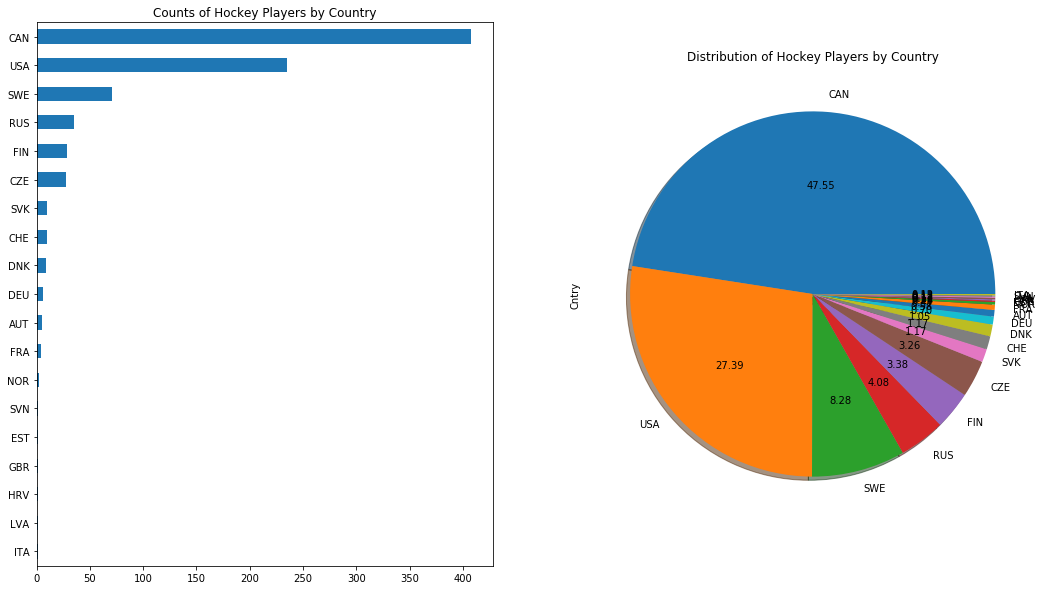

In [12]:
fig, ax=plt.subplots(1,2,figsize=(18,10))
obj_cols['Cntry'].value_counts().sort_values().plot(kind='barh',ax=ax[0]) 
ax[0].set_title("Counts of Hockey Players by Country");
obj_cols['Cntry'].value_counts().plot(kind='pie', autopct='%.2f', shadow=True,ax=ax[1]);
ax[1].set_title("Distribution of Hockey Players by Country");

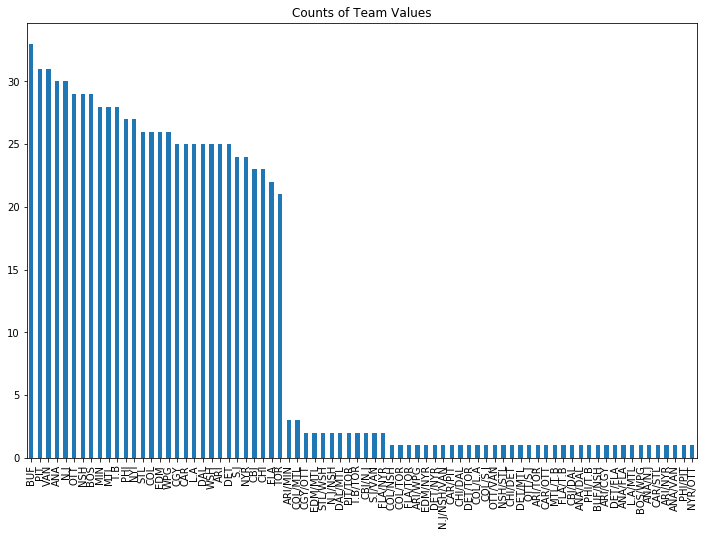

In [13]:
fig, ax=plt.subplots(1,1,figsize=(12,8))
obj_cols['Team'].value_counts().plot(kind='bar',ax=ax);
plt.title('Counts of Team Values');

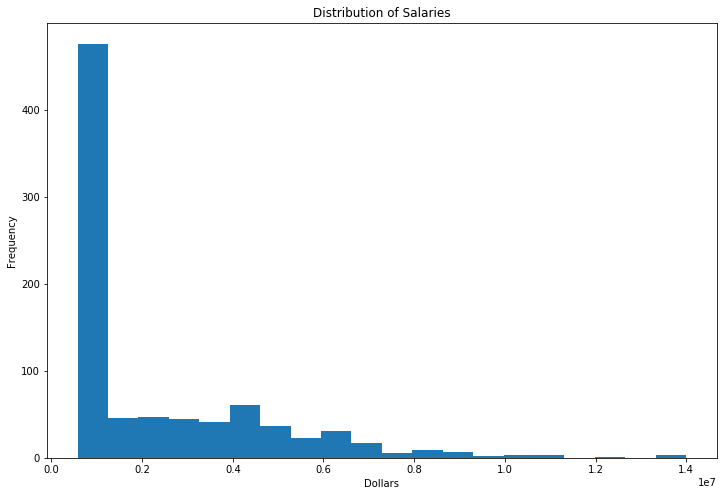

In [14]:
fig, ax=plt.subplots(1,1,figsize=(12,8))
data.Salary.plot(kind='hist',ax=ax, bins=20);
plt.title("Distribution of Salaries");
plt.xlabel('Dollars');

In [15]:
obj_cols.drop('Born',axis=1,inplace=True)
X['Born'] = pd.to_datetime(X.Born)

C:\Users\Sairam\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# CLEANING DATA

In [16]:
X.Born.head()

0   1997-01-30
1   1993-12-21
2   1988-04-16
3   1992-01-07
4   1994-03-29
Name: Born, dtype: datetime64[ns]

In [17]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
X.isnull().sum()

Born            0
City            0
Pr/St         215
Cntry           0
Nat             0
Ht              0
Wt              0
DftYr         124
DftRd         124
Ovrl          124
Hand            0
Last Name       0
First Name      0
Position        0
Team            0
GP              0
G               0
A               0
A1              0
A2              0
PTS             0
+/-             0
E+/-            0
PIM             0
Shifts          0
TOI             0
TOIX            0
TOI/GP          0
TOI%            0
IPP%            1
SH%             1
SV%             0
PDO             1
F/60            0
A/60            0
Pct%            0
Diff            0
iCF            10
iFF            10
iSF             0
ixG             0
iSCF            0
iRB            10
iRS             0
iDS            10
sDist          23
Pass            1
iHF             0
iHA            10
iHDf           10
iMiss           0
iGVA            0
iTKA            0
iGVA.1          0
iBLK            0
BLK%      

In [18]:
X.drop(['Nat'],axis=1,inplace=True)
X.drop(['Pr/St','First Name'],axis=1,inplace=True)

In [19]:
X.head()

,Born,City,Cntry,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,iCF,iFF,iSF,ixG,iSCF,iRB,iRS,iDS,sDist,Pass,iHF,iHA,iHDf,iMiss,iGVA,iTKA,iGVA.1,iBLK,BLK%,iFOW,iFOL,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
0,1997-01-30,Sainte-Marie,CAN,74,190,2015.0,1.0,18.0,L,Chabot,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,2.0,2.0,1,0.0,0,0.0,0,0.0,49.3,0.0,1,0.0,1.0,1,1,0,1,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,9,12,8,10,5,8,0.5,0.9,2,3,0,2,1,1,0,1,1,2,4,5,1,2,1,1,1,1,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38
1,1993-12-21,Ottawa,CAN,74,207,2012.0,1.0,15.0,R,Ceci,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,287.0,197.0,143,6.1,7,7.0,9,16.0,46.3,138.1,111,154.0,-43.0,54,74,22,74,159,8.0,1,0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10,5,-4,2.2,10,0,0,0,0,1433,1992,1038,1423,757,997,62.0,88.8,197,280,56,85,68,82,79,94,147,176,949,939,749,671,284,197,104,98,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18
2,1988-04-16,St. Paul,USA,72,218,2006.0,1.0,7.0,R,Okposo,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,283.0,212.0,156,17.4,64,16.0,20,36.0,26.3,196.8,53,68.0,-15.0,57,36,26,36,25,2.4,54,45,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11,8,-2,-0.5,12,0,0,0,0,1301,1051,986,826,734,606,70.8,46.4,235,133,71,40,60,34,76,52,136,86,739,600,340,351,168,129,56,70,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57
3,1992-01-07,Ottawa,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,88.0,55.0,40,1.4,2,1.0,4,5.0,51.0,153.0,66,66.0,0.0,15,23,4,23,44,7.3,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6,6,1,2.7,4,2,0,0,0,460,605,339,467,259,340,22.0,33.6,80,130,16,35,27,20,29,32,56,52,324,328,198,197,86,59,26,22,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20
4,1994-03-29,Toronto,CAN,76,217,2012.0,1.0,16.0,R,Wilson,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,166.0,118.0,95,9.3,35,8.0,10,18.0,26.4,96.3,239,134.0,105.0,23,21,36,21,44,4.4,3,7,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40,29,-11,-14.3,33,9,0,1,1,766,992,546,720,398,495,33.5,47.5,124,159,31,41,30,37,43,53,73,90,528,490,512,422,157,126,88,68,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27


# FILLING NULL VALUES WITH MODE AND MEDIAN

In [20]:
X['DftYr'].fillna(X['DftYr'].mode()[0], inplace=True)
X['DftRd'].fillna(X['DftRd'].mode()[0], inplace=True)
X['Ovrl'].fillna(X['Ovrl'].mean(), inplace=True)
X['IPP%'].fillna(X['IPP%'].mean(), inplace=True)
X['SH%'].fillna(X['SH%'].mean(), inplace=True)
X['iCF'].fillna(X['iCF'].mean(), inplace=True)
X['iFF'].fillna(X['iFF'].mean(), inplace=True)
X['iRB'].fillna(X['iRB'].mean(), inplace=True)
X['iDS'].fillna(X['iDS'].mean(), inplace=True)
X['Pass'].fillna(X['Pass'].mean(), inplace=True)
X['iHA'].fillna(X['iHA'].mean(), inplace=True)
X['iHDf'].fillna(X['iHDf'].mean(), inplace=True)
X['GS/G'].fillna(X['GS/G'].mean(), inplace=True)
X['sDist'].fillna(X['sDist'].mean(), inplace=True)
X['PDO'].fillna(X['PDO'].mean(), inplace=True)

In [21]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
X.isnull().sum()

Born         0
City         0
Cntry        0
Ht           0
Wt           0
DftYr        0
DftRd        0
Ovrl         0
Hand         0
Last Name    0
Position     0
Team         0
GP           0
G            0
A            0
A1           0
A2           0
PTS          0
+/-          0
E+/-         0
PIM          0
Shifts       0
TOI          0
TOIX         0
TOI/GP       0
TOI%         0
IPP%         0
SH%          0
SV%          0
PDO          0
F/60         0
A/60         0
Pct%         0
Diff         0
iCF          0
iFF          0
iSF          0
ixG          0
iSCF         0
iRB          0
iRS          0
iDS          0
sDist        0
Pass         0
iHF          0
iHA          0
iHDf         0
iMiss        0
iGVA         0
iTKA         0
iGVA.1       0
iBLK         0
BLK%         0
iFOW         0
iFOL         0
FO%          0
%FOT         0
dzFOW        0
dzFOL        0
nzFOW        0
nzFOL        0
ozFOW        0
ozFOL        0
FOW.Up       0
FOL.Up       0
FOW.Down     0
FOL.Down  

In [22]:
import datetime
def from_dob_to_age(born):
    today = datetime.date.today()
    tol= today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    return tol-3

In [23]:
X['Age']=X['Born'].apply(lambda x: from_dob_to_age(x))

In [24]:
X.head()

,Born,City,Cntry,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,iCF,iFF,iSF,ixG,iSCF,iRB,iRS,iDS,sDist,Pass,iHF,iHA,iHDf,iMiss,iGVA,iTKA,iGVA.1,iBLK,BLK%,iFOW,iFOL,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age
0,1997-01-30,Sainte-Marie,CAN,74,190,2015.0,1.0,18.0,L,Chabot,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,2.0,2.0,1,0.0,0,0.0,0,0.0,49.3,0.0,1,0.0,1.0,1,1,0,1,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,9,12,8,10,5,8,0.5,0.9,2,3,0,2,1,1,0,1,1,2,4,5,1,2,1,1,1,1,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38,20
1,1993-12-21,Ottawa,CAN,74,207,2012.0,1.0,15.0,R,Ceci,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,287.0,197.0,143,6.1,7,7.0,9,16.0,46.3,138.1,111,154.0,-43.0,54,74,22,74,159,8.0,1,0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10,5,-4,2.2,10,0,0,0,0,1433,1992,1038,1423,757,997,62.0,88.8,197,280,56,85,68,82,79,94,147,176,949,939,749,671,284,197,104,98,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18,23
2,1988-04-16,St. Paul,USA,72,218,2006.0,1.0,7.0,R,Okposo,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,283.0,212.0,156,17.4,64,16.0,20,36.0,26.3,196.8,53,68.0,-15.0,57,36,26,36,25,2.4,54,45,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11,8,-2,-0.5,12,0,0,0,0,1301,1051,986,826,734,606,70.8,46.4,235,133,71,40,60,34,76,52,136,86,739,600,340,351,168,129,56,70,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57,29
3,1992-01-07,Ottawa,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,88.0,55.0,40,1.4,2,1.0,4,5.0,51.0,153.0,66,66.0,0.0,15,23,4,23,44,7.3,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6,6,1,2.7,4,2,0,0,0,460,605,339,467,259,340,22.0,33.6,80,130,16,35,27,20,29,32,56,52,324,328,198,197,86,59,26,22,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20,25
4,1994-03-29,Toronto,CAN,76,217,2012.0,1.0,16.0,R,Wilson,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,166.0,118.0,95,9.3,35,8.0,10,18.0,26.4,96.3,239,134.0,105.0,23,21,36,21,44,4.4,3,7,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40,29,-11,-14.3,33,9,0,1,1,766,992,546,720,398,495,33.5,47.5,124,159,31,41,30,37,43,53,73,90,528,490,512,422,157,126,88,68,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27,23


In [25]:
X.drop(['Born'],axis=1,inplace=True)

# PERFORMING ONE HOT ENCODING TO EXTRACT FEATURES

In [26]:
def one_hot_encode(df,variable,top_x):# EXTRACTED TOP 10 FREQUENTING OCCURING VALUES AS CATEGORIES
    for label in top_x:
        df[variable+'_'+label]=np.where(data[variable]==label,1,0)


In [27]:
X.Cntry.value_counts().sort_values(ascending=False).head(20)

CAN    408
USA    235
SWE     71
RUS     35
FIN     29
CZE     28
SVK     10
CHE     10
DNK      9
DEU      6
AUT      5
FRA      4
NOR      2
SVN      1
EST      1
GBR      1
HRV      1
LVA      1
ITA      1
Name: Cntry, dtype: int64

In [28]:
top_10=[x for x in X.Cntry.value_counts().sort_values(ascending=False).head(10).index]

In [29]:
top_10

['CAN', 'USA', 'SWE', 'RUS', 'FIN', 'CZE', 'SVK', 'CHE', 'DNK', 'DEU']

In [30]:
one_hot_encode(X,'Cntry',top_10)
X.head()

,City,Cntry,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,iCF,iFF,iSF,ixG,iSCF,iRB,iRS,iDS,sDist,Pass,iHF,iHA,iHDf,iMiss,iGVA,iTKA,iGVA.1,iBLK,BLK%,iFOW,iFOL,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,Cntry_CAN,Cntry_USA,Cntry_SWE,Cntry_RUS,Cntry_FIN,Cntry_CZE,Cntry_SVK,Cntry_CHE,Cntry_DNK,Cntry_DEU
0,Sainte-Marie,CAN,74,190,2015.0,1.0,18.0,L,Chabot,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,2.0,2.0,1,0.0,0,0.0,0,0.0,49.3,0.0,1,0.0,1.0,1,1,0,1,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,9,12,8,10,5,8,0.5,0.9,2,3,0,2,1,1,0,1,1,2,4,5,1,2,1,1,1,1,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38,20,1,0,0,0,0,0,0,0,0,0
1,Ottawa,CAN,74,207,2012.0,1.0,15.0,R,Ceci,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,287.0,197.0,143,6.1,7,7.0,9,16.0,46.3,138.1,111,154.0,-43.0,54,74,22,74,159,8.0,1,0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10,5,-4,2.2,10,0,0,0,0,1433,1992,1038,1423,757,997,62.0,88.8,197,280,56,85,68,82,79,94,147,176,949,939,749,671,284,197,104,98,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18,23,1,0,0,0,0,0,0,0,0,0
2,St. Paul,USA,72,218,2006.0,1.0,7.0,R,Okposo,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,283.0,212.0,156,17.4,64,16.0,20,36.0,26.3,196.8,53,68.0,-15.0,57,36,26,36,25,2.4,54,45,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11,8,-2,-0.5,12,0,0,0,0,1301,1051,986,826,734,606,70.8,46.4,235,133,71,40,60,34,76,52,136,86,739,600,340,351,168,129,56,70,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57,29,0,1,0,0,0,0,0,0,0,0
3,Ottawa,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,88.0,55.0,40,1.4,2,1.0,4,5.0,51.0,153.0,66,66.0,0.0,15,23,4,23,44,7.3,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6,6,1,2.7,4,2,0,0,0,460,605,339,467,259,340,22.0,33.6,80,130,16,35,27,20,29,32,56,52,324,328,198,197,86,59,26,22,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20,25,1,0,0,0,0,0,0,0,0,0
4,Toronto,CAN,76,217,2012.0,1.0,16.0,R,Wilson,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,166.0,118.0,95,9.3,35,8.0,10,18.0,26.4,96.3,239,134.0,105.0,23,21,36,21,44,4.4,3,7,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40,29,-11,-14.3,33,9,0,1,1,766,992,546,720,398,495,33.5,47.5,124,159,31,41,30,37,43,53,73,90,528,490,512,422,157,126,88,68,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27,23,1,0,0,0,0,0,0,0,0,0


In [31]:
X.Position.value_counts().sort_values(ascending=False).head(20)
#top_10=[x for x in X.Position.value_counts().sort_values(ascending=False).head(10).index]
#one_hot_encode(X,'Position',top_10)
#X.head()

D          286
C          139
RW          88
LW          72
C/LW        56
LW/C        46
C/RW        42
LW/RW       32
RW/LW       29
RW/C        23
LW/C/RW     10
C/LW/RW      9
C/RW/LW      7
RW/C/LW      5
LW/RW/C      5
RW/LW/C      4
D/RW         2
D/LW         1
C/D          1
C/LW/C       1
Name: Position, dtype: int64

In [32]:
top_10=[x for x in X.Position.value_counts().sort_values(ascending=False).head(10).index]
one_hot_encode(X,'Position',top_10)
X.head()

,City,Cntry,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,iCF,iFF,iSF,ixG,iSCF,iRB,iRS,iDS,sDist,Pass,iHF,iHA,iHDf,iMiss,iGVA,iTKA,iGVA.1,iBLK,BLK%,iFOW,iFOL,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,Cntry_CAN,Cntry_USA,Cntry_SWE,Cntry_RUS,Cntry_FIN,Cntry_CZE,Cntry_SVK,Cntry_CHE,Cntry_DNK,Cntry_DEU,Position_D,Position_C,Position_RW,Position_LW,Position_C/LW,Position_LW/C,Position_C/RW,Position_LW/RW,Position_RW/LW,Position_RW/C
0,Sainte-Marie,CAN,74,190,2015.0,1.0,18.0,L,Chabot,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,2.0,2.0,1,0.0,0,0.0,0,0.0,49.3,0.0,1,0.0,1.0,1,1,0,1,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,9,12,8,10,5,8,0.5,0.9,2,3,0,2,1,1,0,1,1,2,4,5,1,2,1,1,1,1,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38,20,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Ottawa,CAN,74,207,2012.0,1.0,15.0,R,Ceci,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,287.0,197.0,143,6.1,7,7.0,9,16.0,46.3,138.1,111,154.0,-43.0,54,74,22,74,159,8.0,1,0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10,5,-4,2.2,10,0,0,0,0,1433,1992,1038,1423,757,997,62.0,88.8,197,280,56,85,68,82,79,94,147,176,949,939,749,671,284,197,104,98,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18,23,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,St. Paul,USA,72,218,2006.0,1.0,7.0,R,Okposo,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,283.0,212.0,156,17.4,64,16.0,20,36.0,26.3,196.8,53,68.0,-15.0,57,36,26,36,25,2.4,54,45,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11,8,-2,-0.5,12,0,0,0,0,1301,1051,986,826,734,606,70.8,46.4,235,133,71,40,60,34,76,52,136,86,739,600,340,351,168,129,56,70,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57,29,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Ottawa,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,88.0,55.0,40,1.4,2,1.0,4,5.0,51.0,153.0,66,66.0,0.0,15,23,4,23,44,7.3,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6,6,1,2.7,4,2,0,0,0,460,605,339,467,259,340,22.0,33.6,80,130,16,35,27,20,29,32,56,52,324,328,198,197,86,59,26,22,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,Toronto,CAN,76,217,2012.0,1.0,16.0,R,Wilson,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,166.0,118.0,95,9.3,35,8.0,10,18.0,26.4,96.3,239,134.0,105.0,23,21,36,21,44,4.4,3,7,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40,29,-11,-14.3,33,9,0,1,1,766,992,546,720,398,495,33.5,47.5,124,159,31,41,30,37,43,53,73,90,528,490,512,422,157,126,88,68,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27,23,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [33]:
X.Team.value_counts().sort_values(ascending=False).head(20)

BUF    33
PIT    31
VAN    31
ANA    30
N.J    30
OTT    29
NSH    29
BOS    29
T.B    28
MTL    28
MIN    28
PHI    27
NYI    27
STL    26
COL    26
EDM    26
WPG    26
DAL    25
DET    25
ARI    25
Name: Team, dtype: int64

In [34]:
top_10=[x for x in X.Team.value_counts().sort_values(ascending=False).head(10).index]
one_hot_encode(X,'Position',top_10)
X.head()

,City,Cntry,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,Position,Team,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,iCF,iFF,iSF,ixG,iSCF,iRB,iRS,iDS,sDist,Pass,iHF,iHA,iHDf,iMiss,iGVA,iTKA,iGVA.1,iBLK,BLK%,iFOW,iFOL,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,Cntry_CAN,Cntry_USA,Cntry_SWE,Cntry_RUS,Cntry_FIN,Cntry_CZE,Cntry_SVK,Cntry_CHE,Cntry_DNK,Cntry_DEU,Position_D,Position_C,Position_RW,Position_LW,Position_C/LW,Position_LW/C,Position_C/RW,Position_LW/RW,Position_RW/LW,Position_RW/C,Position_BUF,Position_PIT,Position_VAN,Position_ANA,Position_N.J,Position_OTT,Position_NSH,Position_BOS,Position_T.B,Position_MTL
0,Sainte-Marie,CAN,74,190,2015.0,1.0,18.0,L,Chabot,D,OTT,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,2.0,2.0,1,0.0,0,0.0,0,0.0,49.3,0.0,1,0.0,1.0,1,1,0,1,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,9,12,8,10,5,8,0.5,0.9,2,3,0,2,1,1,0,1,1,2,4,5,1,2,1,1,1,1,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38,20,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ottawa,CAN,74,207,2012.0,1.0,15.0,R,Ceci,D,OTT,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,287.0,197.0,143,6.1,7,7.0,9,16.0,46.3,138.1,111,154.0,-43.0,54,74,22,74,159,8.0,1,0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10,5,-4,2.2,10,0,0,0,0,1433,1992,1038,1423,757,997,62.0,88.8,197,280,56,85,68,82,79,94,147,176,949,939,749,671,284,197,104,98,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18,23,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,St. Paul,USA,72,218,2006.0,1.0,7.0,R,Okposo,RW,BUF,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,283.0,212.0,156,17.4,64,16.0,20,36.0,26.3,196.8,53,68.0,-15.0,57,36,26,36,25,2.4,54,45,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11,8,-2,-0.5,12,0,0,0,0,1301,1051,986,826,734,606,70.8,46.4,235,133,71,40,60,34,76,52,136,86,739,600,340,351,168,129,56,70,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57,29,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ottawa,CAN,77,220,2010.0,1.0,3.0,R,Gudbranson,D,VAN,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,88.0,55.0,40,1.4,2,1.0,4,5.0,51.0,153.0,66,66.0,0.0,15,23,4,23,44,7.3,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6,6,1,2.7,4,2,0,0,0,460,605,339,467,259,340,22.0,33.6,80,130,16,35,27,20,29,32,56,52,324,328,198,197,86,59,26,22,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Toronto,CAN,76,217,2012.0,1.0,16.0,R,Wilson,RW,WSH,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,166.0,118.0,95,9.3,35,8.0,10,18.0,26.4,96.3,239,134.0,105.0,23,21,36,21,44,4.4,3,7,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40,29,-11,-14.3,33,9,0,1,1,766,992,546,720,398,495,33.5,47.5,124,159,31,41,30,37,43,53,73,90,528,490,512,422,157,126,88,68,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27,23,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Columns: 169 entries, City to Position_MTL
dtypes: float64(37), int32(30), int64(96), object(6)
memory usage: 1.0+ MB


In [36]:
X.drop(['Cntry','Position','Team'],axis=1,inplace=True)

In [37]:
X.head()

,City,Ht,Wt,DftYr,DftRd,Ovrl,Hand,Last Name,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,iCF,iFF,iSF,ixG,iSCF,iRB,iRS,iDS,sDist,Pass,iHF,iHA,iHDf,iMiss,iGVA,iTKA,iGVA.1,iBLK,BLK%,iFOW,iFOL,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,Cntry_CAN,Cntry_USA,Cntry_SWE,Cntry_RUS,Cntry_FIN,Cntry_CZE,Cntry_SVK,Cntry_CHE,Cntry_DNK,Cntry_DEU,Position_D,Position_C,Position_RW,Position_LW,Position_C/LW,Position_LW/C,Position_C/RW,Position_LW/RW,Position_RW/LW,Position_RW/C,Position_BUF,Position_PIT,Position_VAN,Position_ANA,Position_N.J,Position_OTT,Position_NSH,Position_BOS,Position_T.B,Position_MTL
0,Sainte-Marie,74,190,2015.0,1.0,18.0,L,Chabot,1,0,0,0,0,0,-2,0.0,0,13,429,7.2,7.15,15.2,0.0,0.0,0.750,750.0,0.00,16.74,0.0,-2,2.0,2.0,1,0.0,0,0.0,0,0.0,49.3,0.0,1,0.0,1.0,1,1,0,1,0,0.0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,9,12,8,10,5,8,0.5,0.9,2,3,0,2,1,1,0,1,1,2,4,5,1,2,1,1,1,1,0.0,-0.2,-0.2,40.03,1,0.0,175.7,-0.4,-0.38,20,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Ottawa,74,207,2012.0,1.0,15.0,R,Ceci,79,2,15,6,9,17,-11,-10.4,20,2418,109992,1826.2,23.20,39.0,30.4,7.4,0.915,989.0,1.84,2.79,39.7,-29,287.0,197.0,143,6.1,7,7.0,9,16.0,46.3,138.1,111,154.0,-43.0,54,74,22,74,159,8.0,1,0,100.0,0.1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2,51,2,0,49,12,0,1,79,10,6,10,5,-4,2.2,10,0,0,0,0,1433,1992,1038,1423,757,997,62.0,88.8,197,280,56,85,68,82,79,94,147,176,949,939,749,671,284,197,104,98,-0.2,3.4,3.2,2850.59,290,13.3,112.5,14.1,0.18,23,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,St. Paul,72,218,2006.0,1.0,7.0,R,Okposo,65,19,26,13,13,45,-7,-1.4,24,1443,73983,1229.2,18.97,33.1,63.4,9.7,0.934,1031.0,3.47,1.95,64.0,31,283.0,212.0,156,17.4,64,16.0,20,36.0,26.3,196.8,53,68.0,-15.0,57,36,26,36,25,2.4,54,45,54.5,7.4,9,6,10,11,35,28,13,10,21,16,37,33,1,5,2,0,0,0,5,2,0,3,0,0,9,0,2,4,51,19,3,3,20,8,2,101,12,10,11,8,-2,-0.5,12,0,0,0,0,1301,1051,986,826,734,606,70.8,46.4,235,133,71,40,60,34,76,52,136,86,739,600,340,351,168,129,56,70,3.7,1.3,5.0,2486.75,102,6.6,114.8,36.8,0.57,29,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ottawa,77,220,2010.0,1.0,3.0,R,Gudbranson,30,1,5,5,0,6,-14,-5.3,18,765,36603,607.9,20.33,36.1,37.5,6.2,0.897,959.0,1.58,3.45,31.4,-19,88.0,55.0,40,1.4,2,1.0,4,5.0,51.0,153.0,66,66.0,0.0,15,23,4,23,44,7.3,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,15,0,0,18,3,0,0,19,6,7,6,6,1,2.7,4,2,0,0,0,460,605,339,467,259,340,22.0,33.6,80,130,16,35,27,20,29,32,56,52,324,328,198,197,86,59,26,22,0.0,0.4,0.5,1074.41,130,17.5,105.1,5.9,0.20,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Toronto,76,217,2012.0,1.0,16.0,R,Wilson,82,7,12,4,8,19,9,4.1,133,1453,63592,1059.7,12.93,23.5,61.3,7.8,0.917,995.0,1.76,2.32,43.1,-10,166.0,118.0,95,9.3,35,8.0,10,18.0,26.4,96.3,239,134.0,105.0,23,21,36,21,44,4.4,3,7,30.0,1.0,1,1,0,2,2,4,3,1,0,3,2,6,0,2,0,1,0,0,0,0,0,0,1,0,6,0,2,1,20,7,2,3,10,11,1,61,44,33,40,29,-11,-14.3,33,9,0,1,1,766,992,546,720,398,495,33.5,47.5,124,159,31,41,30,37,43,53,73,90,528,490,512,422,157,126,88,68,-0.1,1.4,1.3,3459.09,425,8.3,99.5,21.8,0.27,23,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
X.drop(['Hand'],axis=1,inplace=True)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [40]:
X_train.head(4)

,City,Ht,Wt,DftYr,DftRd,Ovrl,Last Name,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,iCF,iFF,iSF,ixG,iSCF,iRB,iRS,iDS,sDist,Pass,iHF,iHA,iHDf,iMiss,iGVA,iTKA,iGVA.1,iBLK,BLK%,iFOW,iFOL,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,Cntry_CAN,Cntry_USA,Cntry_SWE,Cntry_RUS,Cntry_FIN,Cntry_CZE,Cntry_SVK,Cntry_CHE,Cntry_DNK,Cntry_DEU,Position_D,Position_C,Position_RW,Position_LW,Position_C/LW,Position_LW/C,Position_C/RW,Position_LW/RW,Position_RW/LW,Position_RW/C,Position_BUF,Position_PIT,Position_VAN,Position_ANA,Position_N.J,Position_OTT,Position_NSH,Position_BOS,Position_T.B,Position_MTL
37,Denver,74,205,2012.0,4.0,120.0,Slavin,82,5,29,14,15,34,23,10.7,12,2135,115316,1878.2,23.43,39.4,40.5,9.5,0.912,1007.0,2.68,2.36,53.2,10,230.0,156.0,99,4.9,5,5.0,8,13.0,44.9,269.8,35,125.0,-90.0,57,54,83,53,159,9.6,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,2,0,0,0,2,0,2,4,51,9,0,42,18,0,0,30,6,4,6,4,-2,5.5,6,0,0,0,0,1665,1649,1224,1212,883,843,83.8,82.5,283,295,84,74,82,70,94,80,176,150,914,823,512,664,292,347,73,86,1.9,6.7,8.6,2885.99,208,19.7,105.9,46.5,0.57,23,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
318,Boxford,75,228,2009.0,1.0,19.0,Kreider,75,28,25,18,7,53,6,7.3,58,1685,76522,1274.6,17.00,29.9,70.7,9.5,0.903,999.0,3.53,2.26,61.0,27,318.0,271.0,186,25.8,109,20.0,10,30.0,21.6,330.4,132,86.0,46.0,85,33,17,33,30,3.2,5,4,55.6,0.7,1,1,0,0,4,3,1,2,2,0,4,3,1,7,4,0,0,0,2,1,2,5,9,0,9,0,3,3,79,16,5,9,41,31,1,83,26,19,28,18,-7,-7.6,24,2,0,0,0,1460,949,1111,708,788,497,76.3,41.6,262,130,75,48,61,31,50,54,111,85,666,657,418,429,225,130,63,71,5.4,1.4,6.8,2988.29,222,6.2,113.4,59.7,0.80,26,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48,Yaroslavl,73,201,2015.0,1.0,7.0,Provorov,82,6,24,15,9,30,-7,-1.1,34,2337,108132,1790.8,21.98,36.8,52.6,7.1,0.905,976.0,1.91,2.65,41.9,-22,332.0,221.0,161,7.1,10,1.0,8,9.0,45.7,331.4,111,141.0,-30.0,59,81,23,81,166,9.8,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,1,0,0,0,5,2,2,3,52,5,0,33,39,1,0,83,15,9,17,6,-6,-1.4,15,0,0,0,0,1502,1701,1097,1185,800,831,64.6,73.8,210,249,57,79,68,70,77,82,145,152,894,819,603,719,263,154,100,97,1.7,3.9,5.7,3080.32,311,8.9,107.3,35.3,0.43,20,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
474,Ann Arbor,73,206,2013.0,4.0,104.0,Copp,64,9,8,6,2,17,8,6.8,18,1198,47398,772.9,12.35,22.6,65.4,7.7,0.920,997.0,2.02,2.33,46.4,-4,126.0,103.0,77,8.8,33,5.0,8,13.0,21.2,117.6,87,64.0,23.0,26,16,20,15,28,3.7,95,97,49.5,27.1,32,39,32,38,31,20,28,23,39,47,62,63,0,4,1,0,0,0,0,1,1,0,1,0,6,1,1,6,18,5,5,3,7,6,2,49,9,4,8,3,-5,-4.0,9,0,0,0,0,602,748,454,531,337,373,29.5,30.9,103,94,26,30,21,21,42,38,63,59,367,330,398,284,105,83,48,38,0.7,1.1,1.7,2639.49,133,11.9,104.8,17.6,0.28,23,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train.head()

37      742500
318    5000000
48      925000
474     925000
395     925000
Name: Salary, dtype: int64

In [42]:
X_test.head()

,City,Ht,Wt,DftYr,DftRd,Ovrl,Last Name,GP,G,A,A1,A2,PTS,+/-,E+/-,PIM,Shifts,TOI,TOIX,TOI/GP,TOI%,IPP%,SH%,SV%,PDO,F/60,A/60,Pct%,Diff,iCF,iFF,iSF,ixG,iSCF,iRB,iRS,iDS,sDist,Pass,iHF,iHA,iHDf,iMiss,iGVA,iTKA,iGVA.1,iBLK,BLK%,iFOW,iFOL,FO%,%FOT,dzFOW,dzFOL,nzFOW,nzFOL,ozFOW,ozFOL,FOW.Up,FOL.Up,FOW.Down,FOL.Down,FOW.Close,FOL.Close,OTG,1G,GWG,ENG,PSG,PSA,G.Bkhd,G.Dflct,G.Slap,G.Snap,G.Tip,G.Wrap,G.Wrst,CBar,Post,Over,Wide,S.Bkhd,S.Dflct,S.Slap,S.Snap,S.Tip,S.Wrap,S.Wrst,iPenT,iPenD,iPENT,iPEND,iPenDf,NPD,Min,Maj,Match,Misc,Game,CF,CA,FF,FA,SF,SA,xGF,xGA,SCF,SCA,GF,GA,RBF,RBA,RSF,RSA,DSF,DSA,FOW,FOL,HF,HA,GVA,TKA,PENT,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G,Age,Cntry_CAN,Cntry_USA,Cntry_SWE,Cntry_RUS,Cntry_FIN,Cntry_CZE,Cntry_SVK,Cntry_CHE,Cntry_DNK,Cntry_DEU,Position_D,Position_C,Position_RW,Position_LW,Position_C/LW,Position_LW/C,Position_C/RW,Position_LW/RW,Position_RW/LW,Position_RW/C,Position_BUF,Position_PIT,Position_VAN,Position_ANA,Position_N.J,Position_OTT,Position_NSH,Position_BOS,Position_T.B,Position_MTL
144,Marshfield,69,170,2008.0,4.0,95.0,Warsofsky,7,0,1,1,0,1,-3,-1.0,6,158,6608,109.6,15.73,28.2,20.0,7.7,0.894,971.0,2.74,3.83,41.7,-2,31.0,23.0,14,0.5,0,0.0,1,1.0,50.300000,25.8,3,3.0,0.0,9,3,2,3,12,9.9,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,5,1,0,0,8,3,0,3,0,-3,-1.4,3,0,0,0,0,115,121,87,93,65,66,5.0,7.4,14,30,5,7,4,9,6,2,10,11,45,68,38,50,15,12,7,4,0.0,-0.1,-0.1,279.53,21,1.7,129.2,1.7,0.24,27,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
774,Houston,80,229,2008.0,1.0,12.0,Myers,11,2,3,0,3,5,5,1.7,13,294,14657,242.5,22.20,38.3,45.5,11.0,0.952,1062.0,2.72,1.48,64.7,5,40.0,23.0,16,1.0,1,1.0,1,2.0,39.000000,0.0,12,8.0,4.0,7,10,6,10,21,8.8,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,2,5,0,0,6,2,0,0,8,5,2,4,2,-3,-1.8,4,1,0,0,0,194,240,142,180,100,124,10.0,12.7,31,41,11,6,11,8,12,9,23,17,107,127,73,79,35,27,22,16,0.5,0.8,1.2,389.99,47,4.5,107.4,6.5,0.59,23,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
263,Belleville,70,188,2011.0,3.0,68.0,Cousins,60,6,10,5,5,16,-6,2.0,31,1006,43204,720.1,12.00,22.9,76.2,5.4,0.921,975.0,1.75,2.08,45.7,-4,163.0,125.0,99,8.9,29,8.0,10,18.0,30.800000,198.2,61,91.0,-30.0,27,14,15,14,24,3.9,89,128,41.0,34.9,26,31,28,50,35,47,37,47,28,33,59,76,0,2,0,0,0,0,0,1,0,2,1,0,2,0,1,1,25,7,5,10,22,10,0,45,14,26,15,20,12,4.0,13,1,0,0,0,758,623,544,444,388,317,29.8,26.9,87,80,21,25,25,28,36,36,61,64,299,323,326,404,106,54,41,55,0.4,0.7,1.1,2418.97,117,5.8,115.1,22.4,0.37,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
788,Calgary,77,221,2008.0,1.0,16.0,Colborne,62,4,4,4,0,8,-21,-9.0,34,942,39800,663.3,10.70,20.1,50.0,6.0,0.896,956.0,1.45,3.26,30.8,-20,76.0,64.0,48,6.4,22,5.0,3,8.0,19.500000,138.6,86,54.0,32.0,16,18,10,18,14,2.4,45,72,38.5,19.6,14,23,13,17,18,32,10,11,22,35,26,40,0,1,0,0,0,0,0,0,0,0,1,0,3,0,0,3,13,6,1,1,2,6,2,30,17,15,16,11,-2,-4.4,17,0,0,0,0,547,580,394,439,266,347,21.9,25.9,58,81,16,36,12,19,14,19,26,38,296,300,326,239,76,56,56,39,-0.5,0.0,-0.5,2635.51,134,5.6,101.9,3.0,0.05,23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
847,Regina,71,198,2009.0,6.0,175.0,Mitchell,1,0,0,0,0,0,0,0.3,0,13,528,8.8,8.80,15.5,0.0,0.0,1.000,1000.0,0.00,0.00,0.0,0,0.0,0.0,0,0.0,0,0.0,0,0.0,33.510551,0.0,2,0.0,2.0,0,0,0,0,0,0.0,0,1,0.0,16.7,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,6,5,6,4,5,4,0.3,0.2,1,1,0,0,0,0,0,0,0,0,0,6,2,1,0,0,0,0,0.0,0.0,0.0,47.98,2,0.0,75.0,0.0,0.04,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
X_train.var()

Ht                4.523132e+00
Wt                2.273101e+02
DftYr             1.735830e+01
DftRd             3.733182e+00
Ovrl              3.333095e+03
GP                8.738880e+02
G                 7.386024e+01
A                 1.595705e+02
A1                5.472538e+01
A2                3.479503e+01
PTS               3.965638e+02
+/-               9.674252e+01
E+/-              2.935493e+01
PIM               6.058628e+02
Shifts            5.513755e+05
TOI               1.247818e+09
TOIX              3.428873e+05
TOI/GP            1.893265e+01
TOI%              4.300437e+01
IPP%              6.990840e+02
SH%               1.536489e+01
SV%               1.857253e-03
PDO               3.520886e+03
F/60              1.587237e+00
A/60              1.628258e+00
Pct%              3.443935e+02
Diff              2.425268e+02
iCF               1.671140e+04
iFF               9.347250e+03
iSF               4.980730e+03
ixG               5.435362e+01
iSCF              8.102322e+02
iRB     

In [44]:
X_train.drop(['Position_MTL'],axis=1,inplace=True)

C:\Users\Sairam\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
cols = X_train.columns.tolist()
cols

['City',
 'Ht',
 'Wt',
 'DftYr',
 'DftRd',
 'Ovrl',
 'Last Name',
 'GP',
 'G',
 'A',
 'A1',
 'A2',
 'PTS',
 '+/-',
 'E+/-',
 'PIM',
 'Shifts',
 'TOI',
 'TOIX',
 'TOI/GP',
 'TOI%',
 'IPP%',
 'SH%',
 'SV%',
 'PDO',
 'F/60',
 'A/60',
 'Pct%',
 'Diff',
 'iCF',
 'iFF',
 'iSF',
 'ixG',
 'iSCF',
 'iRB',
 'iRS',
 'iDS',
 'sDist',
 'Pass',
 'iHF',
 'iHA',
 'iHDf',
 'iMiss',
 'iGVA',
 'iTKA',
 'iGVA.1',
 'iBLK',
 'BLK%',
 'iFOW',
 'iFOL',
 'FO%',
 '%FOT',
 'dzFOW',
 'dzFOL',
 'nzFOW',
 'nzFOL',
 'ozFOW',
 'ozFOL',
 'FOW.Up',
 'FOL.Up',
 'FOW.Down',
 'FOL.Down',
 'FOW.Close',
 'FOL.Close',
 'OTG',
 '1G',
 'GWG',
 'ENG',
 'PSG',
 'PSA',
 'G.Bkhd',
 'G.Dflct',
 'G.Slap',
 'G.Snap',
 'G.Tip',
 'G.Wrap',
 'G.Wrst',
 'CBar ',
 'Post',
 'Over',
 'Wide',
 'S.Bkhd',
 'S.Dflct',
 'S.Slap',
 'S.Snap',
 'S.Tip',
 'S.Wrap',
 'S.Wrst',
 'iPenT',
 'iPenD',
 'iPENT',
 'iPEND',
 'iPenDf',
 'NPD',
 'Min',
 'Maj',
 'Match',
 'Misc',
 'Game',
 'CF',
 'CA',
 'FF',
 'FA',
 'SF',
 'SA',
 'xGF',
 'xGA',
 'SCF',
 'SCA',

# APPYING LOW VARIANCE , TO FILTER OUT COLUMNS WITH <10%contribution

In [46]:
numeric = X_train[['City',
 'Ht',
 'Wt',
 'DftYr',
 'DftRd',
 'Ovrl',
 'Last Name',
 'GP',
 'G',
 'A',
 'A1',
 'A2',
 'PTS',
 '+/-',
 'E+/-',
 'PIM',
 'Shifts',
 'TOI',
 'TOIX',
 'TOI/GP',
 'TOI%',
 'IPP%',
 'SH%',
 'SV%',
 'PDO',
 'F/60',
 'A/60',
 'Pct%',
 'Diff',
 'iCF',
 'iFF',
 'iSF',
 'ixG',
 'iSCF',
 'iRB',
 'iRS',
 'iDS',
 'sDist',
 'Pass',
 'iHF',
 'iHA',
 'iHDf',
 'iMiss',
 'iGVA',
 'iTKA',
 'iGVA.1',
 'iBLK',
 'BLK%',
 'iFOW',
 'iFOL',
 'FO%',
 '%FOT',
 'dzFOW',
 'dzFOL',
 'nzFOW',
 'nzFOL',
 'ozFOW',
 'ozFOL',
 'FOW.Up',
 'FOL.Up',
 'FOW.Down',
 'FOL.Down',
 'FOW.Close',
 'FOL.Close',
 'OTG',
 '1G',
 'GWG',
 'ENG',
 'PSG',
 'PSA',
 'G.Bkhd',
 'G.Dflct',
 'G.Slap',
 'G.Snap',
 'G.Tip',
 'G.Wrap',
 'G.Wrst',
 'CBar ',
 'Post',
 'Over',
 'Wide',
 'S.Bkhd',
 'S.Dflct',
 'S.Slap',
 'S.Snap',
 'S.Tip',
 'S.Wrap',
 'S.Wrst',
 'iPenT',
 'iPenD',
 'iPENT',
 'iPEND',
 'iPenDf',
 'NPD',
 'Min',
 'Maj',
 'Match',
 'Misc',
 'Game',
 'CF',
 'CA',
 'FF',
 'FA',
 'SF',
 'SA',
 'xGF',
 'xGA',
 'SCF',
 'SCA',
 'GF',
 'GA',
 'RBF',
 'RBA',
 'RSF',
 'RSA',
 'DSF',
 'DSA',
 'FOW',
 'FOL',
 'HF',
 'HA',
 'GVA',
 'TKA',
 'PENT',
 'PEND',
 'OPS',
 'DPS',
 'PS',
 'OTOI',
 'Grit',
 'DAP',
 'Pace',
 'GS',
 'GS/G',
 'Cntry_CAN',
 'Cntry_USA',
 'Cntry_SWE',
 'Cntry_RUS',
 'Cntry_FIN',
 'Cntry_CZE',
 'Cntry_SVK',
 'Cntry_CHE',
 'Cntry_DNK',
 'Cntry_DEU',
 'Position_D',
 'Position_C',
 'Position_RW',
 'Position_LW',
 'Position_C/LW',
 'Position_LW/C',
 'Position_C/RW',
 'Position_LW/RW',
 'Position_RW/LW',
 'Position_RW/C',
'Position_BUF', 
'Position_VAN',
'Position_PIT', 
'Position_ANA',
'Position_N.J', 
'Position_NSH', 
'Position_BOS', 
'Position_OTT',
'Position_NSH'
    ]]
var = numeric.var()
numeric = numeric.columns
variable = [ ]
for i in range(0,len(var)):
    if var[i]<10:   #setting the threshold as 10%
       variable.append(numeric[i+1])
variable

['Ht',
 'DftRd',
 'SH%',
 'PDO',
 'F/60',
 'FOL.Close',
 'OTG',
 '1G',
 'GWG',
 'ENG',
 'PSG',
 'PSA',
 'G.Bkhd',
 'G.Dflct',
 'G.Slap',
 'G.Snap',
 'G.Tip',
 'G.Wrst',
 'CBar ',
 'S.Bkhd',
 'S.Tip',
 'Min',
 'Maj',
 'Match',
 'Misc',
 'PEND',
 'OPS',
 'DPS',
 'GS',
 'GS/G',
 'Cntry_CAN',
 'Cntry_USA',
 'Cntry_SWE',
 'Cntry_RUS',
 'Cntry_FIN',
 'Cntry_CZE',
 'Cntry_SVK',
 'Cntry_CHE',
 'Cntry_DNK',
 'Cntry_DEU',
 'Position_D',
 'Position_C',
 'Position_RW',
 'Position_LW',
 'Position_C/LW',
 'Position_LW/C',
 'Position_C/RW',
 'Position_LW/RW',
 'Position_RW/LW',
 'Position_RW/C',
 'Position_BUF',
 'Position_VAN',
 'Position_PIT',
 'Position_ANA',
 'Position_N.J',
 'Position_NSH',
 'Position_BOS',
 'Position_OTT']

In [47]:
X_train.drop(['Ht',
 'DftRd',
 'SH%',
 'PDO',
 'F/60',
 'FOL.Close',
 'OTG',
 '1G',
 'GWG',
 'ENG',
 'PSG',
 'PSA',
 'G.Bkhd',
 'G.Dflct',
 'G.Slap',
 'G.Snap',
 'G.Tip',
 'G.Wrst',
 'CBar ',
 'S.Bkhd',
 'S.Tip',
 'Min',
 'Maj',
 'Match',
 'Misc',
 'PEND',
 'OPS',
 'DPS',
 'GS',
 'Cntry_CAN',
 'Cntry_USA',
 'Cntry_SWE',
 'Cntry_RUS',
 'Cntry_FIN',
 'Cntry_CZE',
 'Cntry_SVK',
 'Cntry_CHE',
 'Cntry_DNK',
 'Cntry_DEU',
 'Position_D',
 'Position_C',
 'Position_RW',
 'Position_LW',
 'Position_C/LW',
 'Position_LW/C',
 'Position_C/RW',
 'Position_LW/RW',
 'Position_RW/LW',
 'Position_RW/C',
 'Position_BUF',
 'Position_VAN',
 'Position_PIT',
 'Position_ANA',
 'Position_N.J',
 'Position_NSH',
 'Position_BOS',
 'Position_OTT',
],axis=1,inplace=True)
             

In [48]:
X_train.drop(['City','Last Name'],axis=1,inplace=True)

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 37 to 684
Columns: 105 entries, Wt to Position_T.B
dtypes: float64(30), int32(1), int64(74)
memory usage: 530.0 KB


# DROPPING COLUMNS WITH HIGH CORRELATION

In [50]:
dropvars = []
threshold = 0.95
df_corr = X_train.corr().stack().reset_index().rename(columns={'level_0': 'Var 1', 'level_1': 'Var 2', 0: 'Corr'})
df_corr = df_corr[(df_corr['Corr'].abs() >= threshold) & (df_corr['Var 1'] != df_corr['Var 2'])]
while len(df_corr) > 0:
    var = df_corr['Var 1'].iloc[0]
    df_corr = df_corr[((df_corr['Var 1'] != var) & (df_corr['Var 2'] != var))]
    dropvars.append(var)
X_train.drop(columns=dropvars, inplace=True)
X_test.drop(columns=dropvars, inplace=True)

In [51]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 37 to 684
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Wt            643 non-null    int64  
 1   DftYr         643 non-null    float64
 2   Ovrl          643 non-null    float64
 3   G             643 non-null    int64  
 4   A2            643 non-null    int64  
 5   PTS           643 non-null    int64  
 6   +/-           643 non-null    int64  
 7   E+/-          643 non-null    float64
 8   TOI%          643 non-null    float64
 9   IPP%          643 non-null    float64
 10  SV%           643 non-null    float64
 11  A/60          643 non-null    float64
 12  Pct%          643 non-null    float64
 13  Diff          643 non-null    int64  
 14  iSF           643 non-null    int64  
 15  iSCF          643 non-null    int64  
 16  iRB           643 non-null    float64
 17  iRS           643 non-null    int64  
 18  iDS           643 non-null   

# USING RANDOM FOREST REGRESSOR

In [52]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
model = RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(X_train)
model.fit(df,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

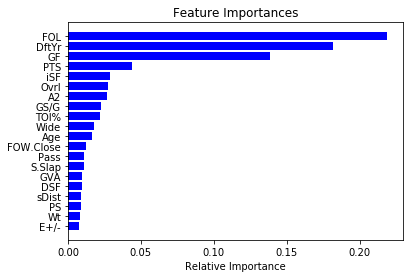

In [53]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # top  features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

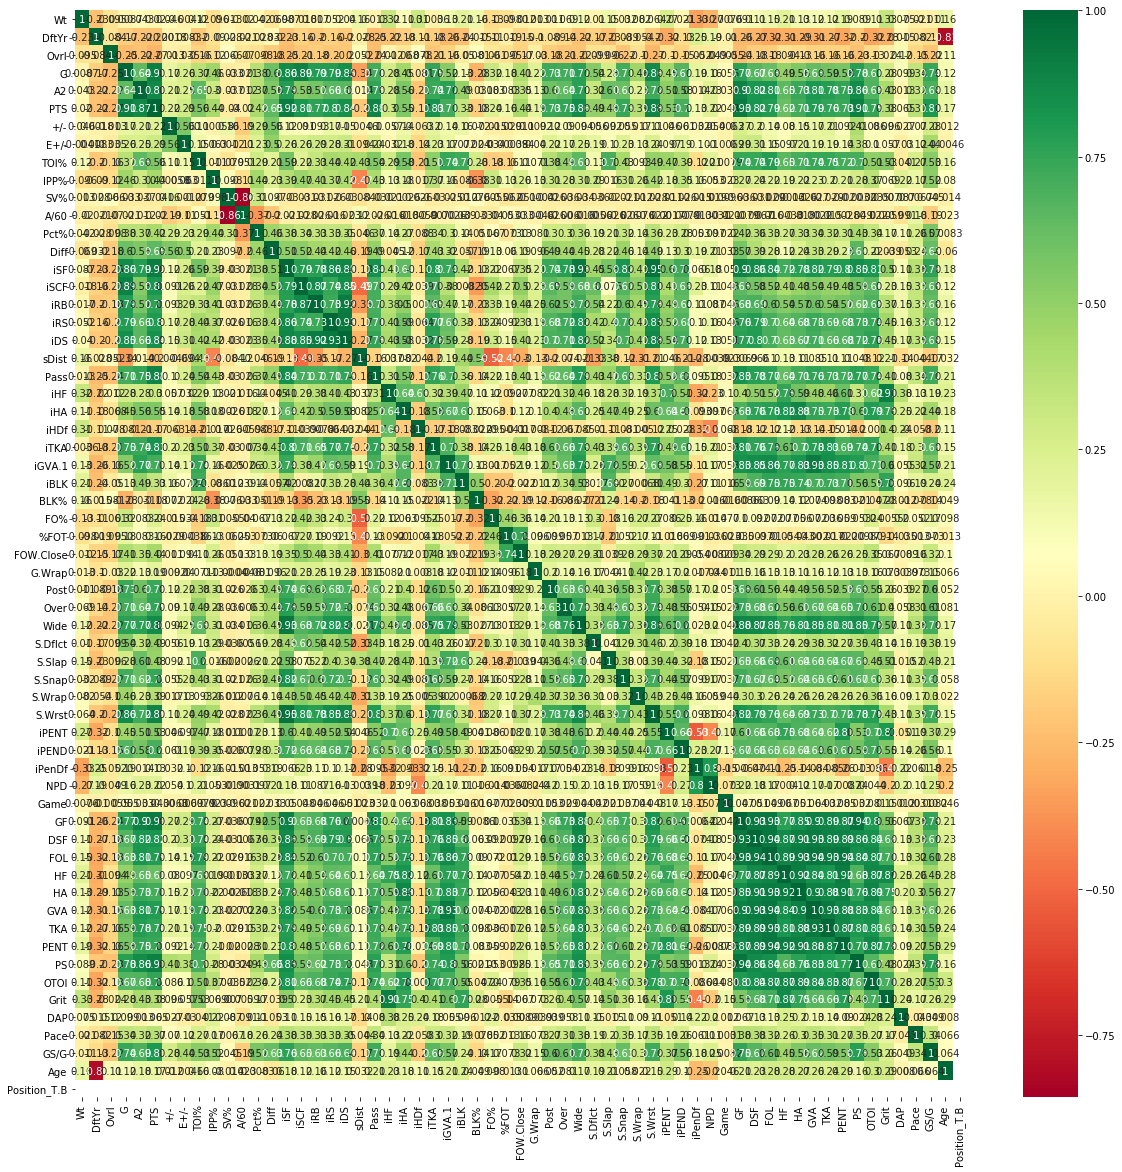

In [54]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#'PS','DftYr','TOI%','GS/G','Pass','Ovrl','S.Wrst','S.Slap','FOW.Close','Diff','iTKA','Over','iPEND','OTOI','S.Snap','%FOT','BLK%','+/-','DAP','Wt'

# HEAT MAP 

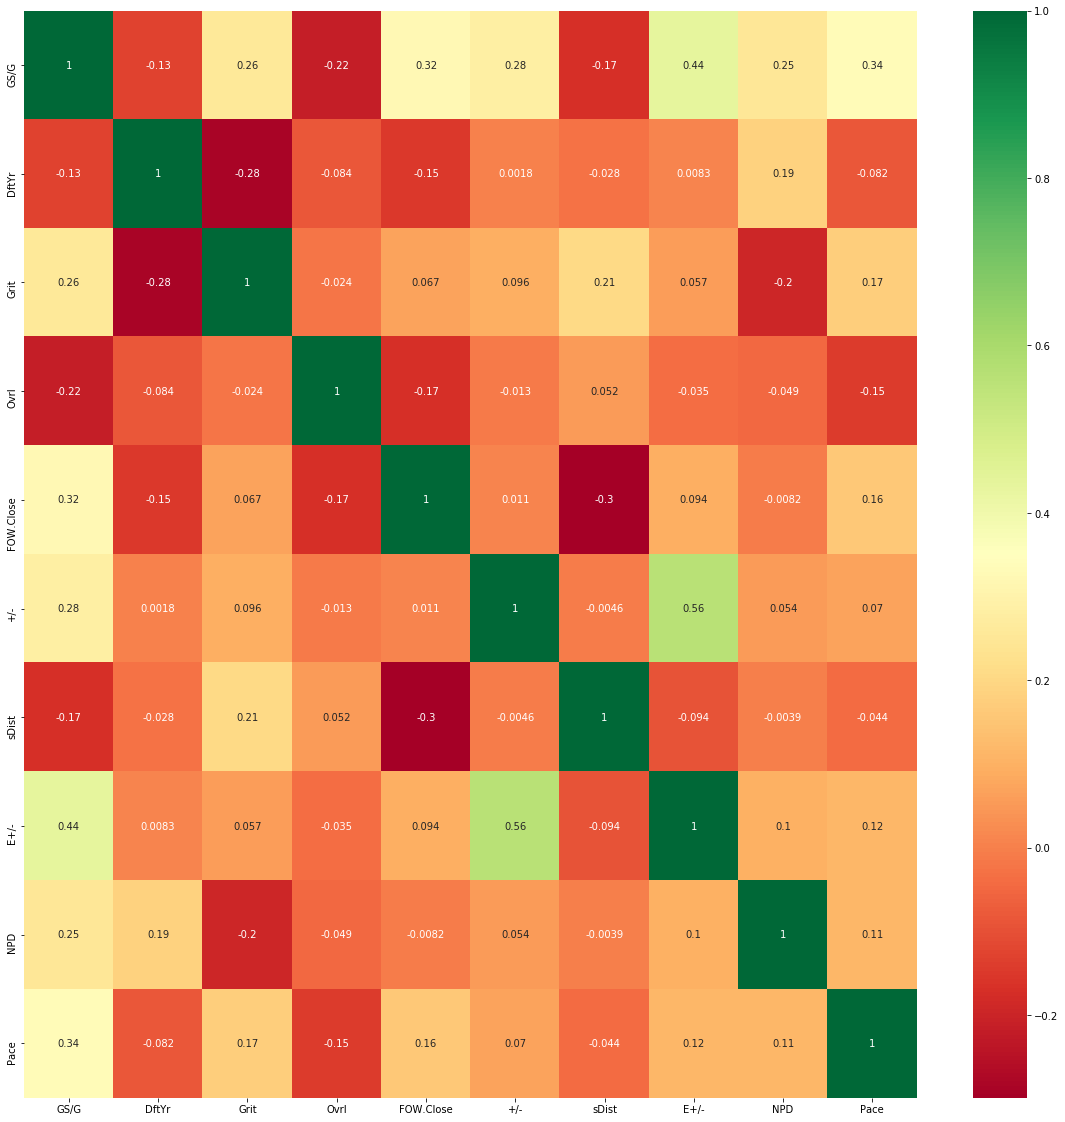

In [55]:
corrmat = X_train.corr()
top_corr_features = ['GS/G','DftYr','Grit','Ovrl','FOW.Close','+/-','sDist','E+/-','NPD','Pace']
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# PLOTTING FEATURE IMPORTANCES

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
df=pd.get_dummies(X_train)
model.fit(df,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [57]:
print(model.feature_importances_)

[0.0179942  0.03662691 0.02325879 0.01381262 0.01505703 0.01497455
 0.01799031 0.01823054 0.0205022  0.01528757 0.01740659 0.0170692
 0.01725562 0.01790524 0.01756663 0.01599283 0.01662157 0.01475122
 0.01404532 0.01616079 0.01551357 0.01749262 0.01788028 0.01770818
 0.01562653 0.0168603  0.01677453 0.01664101 0.012727   0.0144145
 0.01291911 0.0031692  0.01314516 0.01523814 0.01893437 0.01238673
 0.01583504 0.01768237 0.00999259 0.01622578 0.01802014 0.01571515
 0.01645069 0.01641032 0.00446009 0.0166395  0.01757773 0.01838021
 0.01752295 0.01672275 0.01811076 0.01721807 0.01907787 0.01663717
 0.01875931 0.01714287 0.01541622 0.0190362  0.01819277 0.02683251
 0.        ]


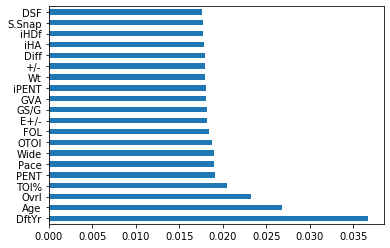

In [58]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


In [59]:
X_train.head()

,Wt,DftYr,Ovrl,G,A2,PTS,+/-,E+/-,TOI%,IPP%,SV%,A/60,Pct%,Diff,iSF,iSCF,iRB,iRS,iDS,sDist,Pass,iHF,iHA,iHDf,iTKA,iGVA.1,iBLK,BLK%,FO%,%FOT,FOW.Close,G.Wrap,Post,Over,Wide,S.Dflct,S.Slap,S.Snap,S.Wrap,S.Wrst,iPENT,iPEND,iPenDf,NPD,Game,GF,DSF,FOL,HF,HA,GVA,TKA,PENT,PS,OTOI,Grit,DAP,Pace,GS/G,Age,Position_T.B
37,205,2012.0,120.0,5,15,34,23,10.7,39.4,40.5,0.912,2.36,53.2,10,99,5,5.0,8,13.0,44.900000,269.8,35,125.0,-90.0,83,53,159,9.6,0.0,0.0,0,0,2,4,51,0,42,18,0,30,6,4,-2,5.5,0,84,176,823,512,664,292,347,73,8.6,2885.99,208,19.7,105.9,0.57,23,0
318,228,2009.0,19.0,28,7,53,6,7.3,29.9,70.7,0.903,2.26,61.0,27,186,109,20.0,10,30.0,21.600000,330.4,132,86.0,46.0,17,33,30,3.2,55.6,0.7,4,0,3,3,79,5,9,41,1,83,28,18,-7,-7.6,0,75,111,657,418,429,225,130,63,6.8,2988.29,222,6.2,113.4,0.80,26,0
48,201,2015.0,7.0,6,9,30,-7,-1.1,36.8,52.6,0.905,2.65,41.9,-22,161,10,1.0,8,9.0,45.700000,331.4,111,141.0,-30.0,23,81,166,9.8,0.0,0.0,0,0,2,3,52,0,33,39,0,83,17,6,-6,-1.4,0,57,145,819,603,719,263,154,100,5.7,3080.32,311,8.9,107.3,0.43,20,0
474,206,2013.0,104.0,9,2,17,8,6.8,22.6,65.4,0.920,2.33,46.4,-4,77,33,5.0,8,13.0,21.200000,117.6,87,64.0,23.0,20,15,28,3.7,49.5,27.1,62,0,1,6,18,5,3,7,2,49,8,3,-5,-4.0,0,26,63,330,398,284,105,83,48,1.7,2639.49,133,11.9,104.8,0.28,23,0
395,225,2012.0,210.0,0,0,0,1,-0.1,29.2,0.0,1.000,0.00,100.0,1,0,0,0.0,0,0.0,33.510551,0.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,1,3,5,8,3,0,3,0,0.1,37.09,0,0.0,117.5,0.00,24,0


# SCALING DATA

In [60]:
X_test.drop(['City','Last Name','Position_MTL'],axis=1,inplace=True)

C:\Users\Sairam\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [61]:
X_test.drop(['Ht',
 'DftRd',
 'SH%',
 'PDO',
 'F/60',
 'FOL.Close',
 'OTG',
 '1G',
 'GWG',
 'ENG',
 'PSG',
 'PSA',
 'G.Bkhd',
 'G.Dflct',
 'G.Slap',
 'G.Snap',
 'G.Tip',
 'G.Wrst',
 'CBar ',
 'S.Bkhd',
 'S.Tip',
 'Min',
 'Maj',
 'Match',
 'Misc',
 'PEND',
 'OPS',
 'DPS',
 'GS',
 'Cntry_CAN',
 'Cntry_USA',
 'Cntry_SWE',
 'Cntry_RUS',
 'Cntry_FIN',
 'Cntry_CZE',
 'Cntry_SVK',
 'Cntry_CHE',
 'Cntry_DNK',
 'Cntry_DEU',
 'Position_D',
 'Position_C',
 'Position_RW',
 'Position_LW',
 'Position_C/LW',
 'Position_LW/C',
 'Position_C/RW',
 'Position_LW/RW',
 'Position_RW/LW',
 'Position_RW/C',
 'Position_BUF',
 'Position_VAN',
 'Position_PIT',
 'Position_ANA',
 'Position_N.J',
 'Position_NSH',
 'Position_BOS',
 'Position_OTT'],axis=1,inplace=True)
             

In [62]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 144 to 116
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Wt            215 non-null    int64  
 1   DftYr         215 non-null    float64
 2   Ovrl          215 non-null    float64
 3   G             215 non-null    int64  
 4   A2            215 non-null    int64  
 5   PTS           215 non-null    int64  
 6   +/-           215 non-null    int64  
 7   E+/-          215 non-null    float64
 8   TOI%          215 non-null    float64
 9   IPP%          215 non-null    float64
 10  SV%           215 non-null    float64
 11  A/60          215 non-null    float64
 12  Pct%          215 non-null    float64
 13  Diff          215 non-null    int64  
 14  iSF           215 non-null    int64  
 15  iSCF          215 non-null    int64  
 16  iRB           215 non-null    float64
 17  iRS           215 non-null    int64  
 18  iDS           215 non-null  

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# MODEL(LINEAR REGRESSION)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg = LinearRegression().fit(X_train, y_train)
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))
y_pred=linreg.predict(X_test)
print('MAE:{:.3f}'.format(metrics.mean_absolute_error(y_test,y_pred)))
print('MSE:{:.3f}'.format(metrics.mean_squared_error(y_test,y_pred)))
print('RMSE:{:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

linear model intercept: 346491569.88283527
R-squared score (training): 0.693
R-squared score (test): 0.586
MAE:1064666.922
MSE:2473366516256.515
RMSE:1572694.031


# Ridge Regression 

In [65]:
from sklearn.linear_model import Ridge
linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
y_pred=linridge.predict(X_test_scaled)
print('MAE:{:.3f}'.format(metrics.mean_absolute_error(y_test,y_pred)))
print('MSE:{:.3f}'.format(metrics.mean_squared_error(y_test,y_pred)))
print('RMSE:{:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

ridge regression linear model intercept: 1285319.9843367564
ridge regression linear model coeff:
[  456171.58860306 -1725648.7818692   -506496.91489654   241874.53887855
   542377.28542924   561815.2893159   -313429.86631074    86448.15017854
   904052.7121746    -89826.94271117     4069.57910057    29836.4932164
    -6894.75032939   252991.84660111   547531.41650049   476897.1077766
    96559.34542385  -317242.25426693  -110397.42118217    78191.67678374
   465815.40071259    -8192.27841263  -187748.34348585   127459.18228384
  -180345.55190312   196414.02219698   185912.36426605  -119714.81661936
   114002.68650147   210373.19923796   694588.40716441    66075.31964887
   129122.54624693   233816.92794806   367302.64307113   113690.77420985
   616988.23136108    85578.8410939     18015.732119     304556.50604995
   183712.95658761  -137289.29508175  -239314.09390643   -65696.38185397
  -221165.96884458   715947.82927142   271744.30481972   797330.84793279
  -165592.56564116   -24228.8

# For alpha=1.0,we obtained r^2 score for test as 0.63 

In [66]:
from sklearn.linear_model import Ridge
linridge = Ridge(alpha=1.0).fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
y_pred=linridge.predict(X_test_scaled)
print('MAE:{:.3f}'.format(metrics.mean_absolute_error(y_test,y_pred)))
print('MSE:{:.3f}'.format(metrics.mean_squared_error(y_test,y_pred)))
print('RMSE:{:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

ridge regression linear model intercept: 2410303.5663345503
ridge regression linear model coeff:
[  347124.64229731 -3901779.87440063  -877039.08004653  -174723.02187385
   785713.62226549   782518.70607404  -554187.5060118    451339.34014046
  1588495.93713395   -91619.93477125   665196.07105125   399425.60035241
   -98790.23861011   837780.41698049  1050771.25429317  2508921.85955545
  -716519.20779597  -844407.87921602  -822515.13710445  -281120.38384535
   251902.3692478    225867.76951333   430921.82293385   341109.04228644
  -686145.90470869  -209368.75974111   220828.33346592  -392104.47135141
   118277.95958223   -21046.1359581   1661771.43100338  -169620.96295843
    94098.61483046   430732.17594237   376202.04719001  -118987.01475333
  1771628.04260744   173906.92814547   198403.41649427   952561.22113467
   254283.39989841  -423542.90258925  -424134.71628022    78934.98202116
  -631340.830879     705226.70034666   105052.96609656  3495341.04651022
 -1233293.42579683  -481021

In [67]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 61, r-squared training: 0.69, r-squared test: 0.59

Alpha = 1.00
num abs(coeff) > 1.0: 60, r-squared training: 0.68, r-squared test: 0.63

Alpha = 10.00
num abs(coeff) > 1.0: 60, r-squared training: 0.62, r-squared test: 0.57

Alpha = 20.00
num abs(coeff) > 1.0: 60, r-squared training: 0.59, r-squared test: 0.53

Alpha = 50.00
num abs(coeff) > 1.0: 60, r-squared training: 0.53, r-squared test: 0.47

Alpha = 100.00
num abs(coeff) > 1.0: 60, r-squared training: 0.48, r-squared test: 0.42

Alpha = 1000.00
num abs(coeff) > 1.0: 60, r-squared training: 0.27, r-squared test: 0.23



# LASSO REGRESSION

In [68]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
y_pred=linlasso.predict(X_test_scaled)
print('MAE:{:.3f}'.format(metrics.mean_absolute_error(y_test,y_pred)))
print('MSE:{:.3f}'.format(metrics.mean_squared_error(y_test,y_pred)))
print('RMSE:{:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

lasso regression linear model intercept: -1986053.5472546425
R-squared score (training): 0.693
R-squared score (test): 0.586

MAE:1064459.403
MSE:2472287894849.183
RMSE:1572351.072


# Conclusion:Using linear regression we obtained r^2 score for test as 0.58 and by using Ridge regression r^2 score for test is 0.63,so we can conclude that ridge regression suits best and is more preferable
                      

# PERFORMING STATISTICAL T TEST

In [69]:
from scipy import stats
from scipy.stats import t
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = np.mean(data1),np.mean(data2)
	# calculate standard errors
	se1, se2 = stats.sem(data1), stats.sem(data2)
	# standard error on the difference between the samples
	sed = np.sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = 0
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 

# generate two independent samples
data1 = y_test[:200]
data2 = y_train[:200]
# calculate the t test
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))

t=1.279, df=398, cv=0.000, p=0.202


In [ ]:
https://zoom.us/j/99011265798?pwd=VURUak1qMDZkZ0pFMlhTS2pEYXZUdz09

# Since obtained p value through t test is >0.2 ,there is certainly no reason to suspect the hypothesis tested. 

